In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_parquet("../dataset/processed_data.parquet")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Full Vehicle Name,Fetched Range,Electric Range,Max Range,Fetched Price,Base MSRP,Legislative District,Vehicle Location,Electric Utility
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),True,2021 BMW X5,0,30.0,30.0,60000,0.0,35.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),True,2018 TESLA MODEL 3,322,215.0,322.0,35490,0.0,23.0,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),False,2016 PORSCHE PANAMERA,0,15.0,15.0,85000,0.0,1.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),True,2018 TESLA MODEL 3,322,215.0,322.0,35490,0.0,23.0,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),True,2019 NISSAN LEAF,150,150.0,150.0,29990,0.0,45.0,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


### Most sold EVs

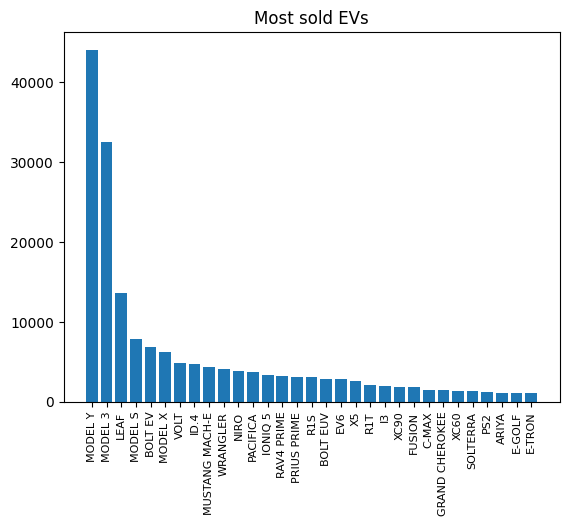

In [ ]:
sales_count = df.groupby("Model").size().reset_index(name="Sales")
sales_count = sales_count.sort_values("Sales", ascending=False)
sales_count = sales_count[sales_count["Sales"] > 1000]
plt.bar(sales_count["Model"], sales_count["Sales"])
plt.xticks(rotation=90, fontsize=8)
plt.title("Most sold EVs")
plt.show()

### Year-wise sales

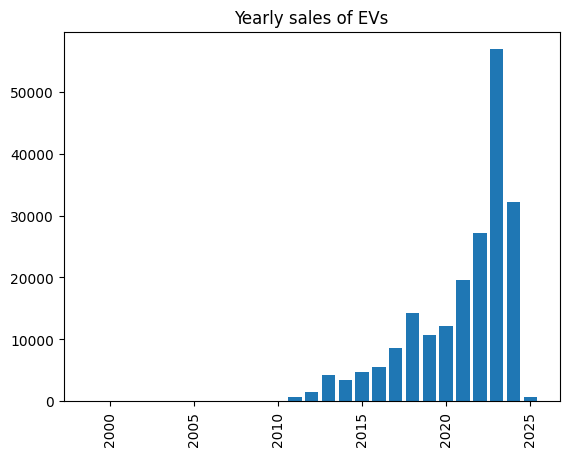

In [ ]:
yearly_sales = df.groupby("Model Year").size().reset_index(name="Sales")
plt.bar(yearly_sales["Model Year"], yearly_sales["Sales"])
plt.xticks(rotation=90)
plt.title("Yearly sales of EVs")
plt.show()

Increasing trend in the EV adoption over the years. 2023 shows a significant growth in EV sales

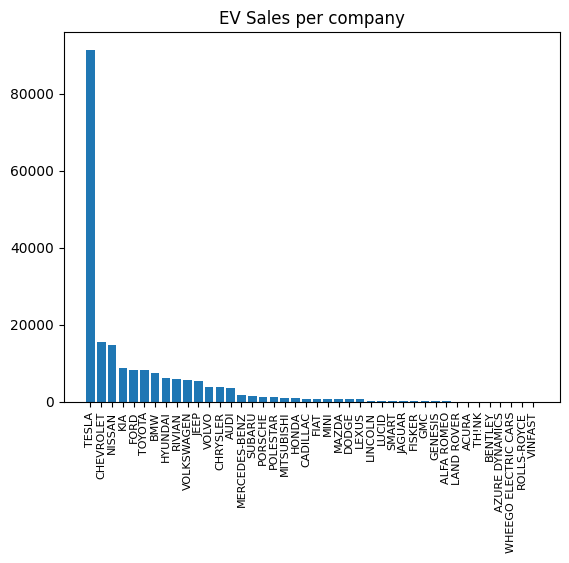

In [ ]:
make_count = df.groupby("Make").size().reset_index(name="Sales")
make_count = make_count.sort_values("Sales", ascending=False)
plt.bar(make_count["Make"], make_count["Sales"])
plt.xticks(rotation=90, fontsize=8)
plt.title("EV Sales per company")
plt.show()

We can see that there is unequal distribution as one company, TESLA, dominates the sales

### Univariate analysis

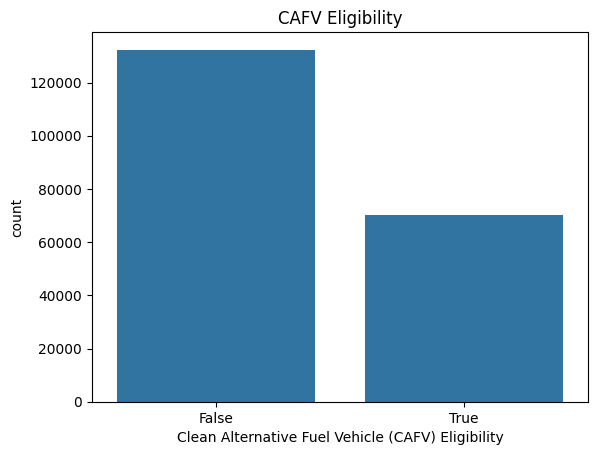

In [ ]:
sns.countplot(x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", data=df)
plt.title("CAFV Eligibility")
plt.show()

Most of the EVs in the market do not have CAFV eligibility

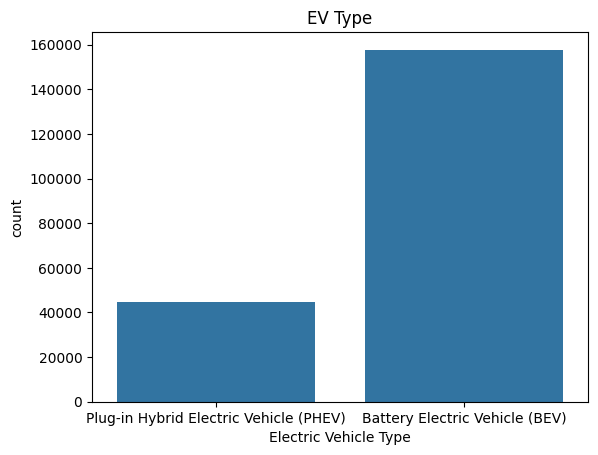

In [ ]:
sns.countplot(x="Electric Vehicle Type", data=df)
plt.title("EV Type")
plt.show()

Numerical variable

In [ ]:
def plot_statistics(data):
    mini = data.min()
    maxi = data.max()
    ran = data.max() - data.min()
    mean = data.mean()
    median = data.median()
    st_dev = data.std()
    skew = data.skew()
    kurt = data.kurtosis()
    points = mean - st_dev, mean + st_dev
    sns.kdeplot(data, fill=True)
    plt.plot(points, [0, 0], color="black", label="std_dev")
    plt.scatter([mini, maxi], [0, 0], color="orange", label="min/max")
    plt.scatter([mean], [0], color="red", label="mean")
    plt.scatter([median], [0], color="blue", label="median")
    plt.ylabel("density")
    plt.title(
        "std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}".format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2),
        )
    )
    plt.legend()

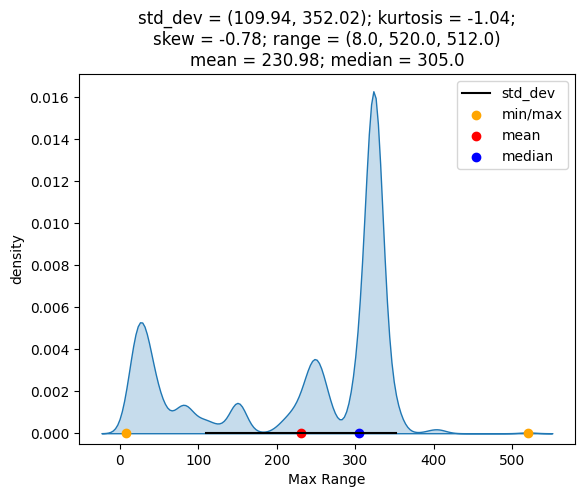

In [ ]:
# Distribution of Electric Range
plot_statistics(df["Max Range"])
plt.ylim(bottom=-0.0005)
plt.show()

Average electric range = 50.6
Most of the EVs have electric range between 0 to 337


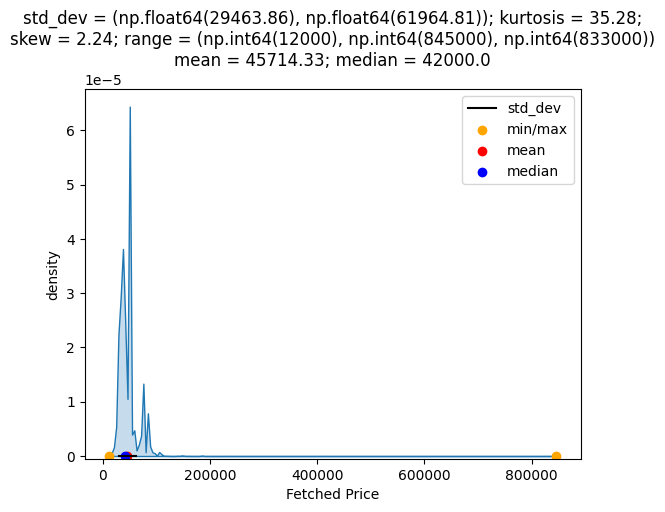

In [ ]:
# Distribution of Price
plot_statistics(df["Fetched Price"])
plt.ylim(bottom=-0.0000005)
plt.show()

Average price of EVs is \$47539  
Price of EVs mostly range between \$12,000 to \$845,000  


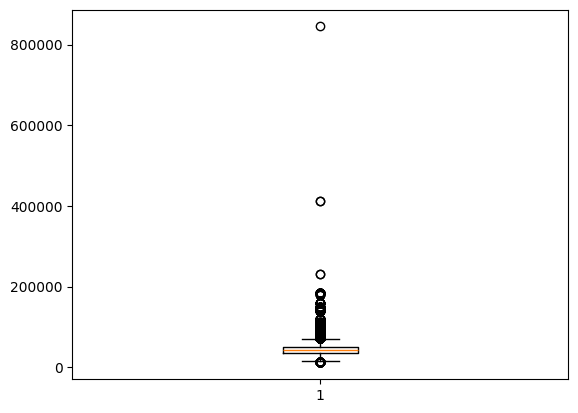

In [ ]:
plt.boxplot(df["Fetched Price"])
plt.show()

Consider values above \$200,000 as outliers and remove for analysis

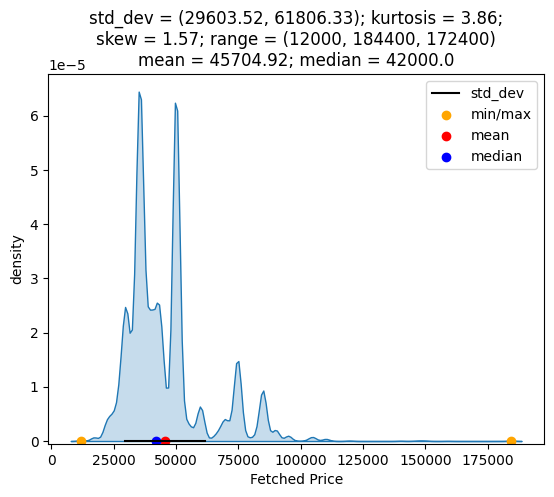

In [ ]:
# cleaned_prices = df_car[df_car.price < 200000]
cleaned_prices = df[df["Fetched Price"] < 200000]
plot_statistics(cleaned_prices["Fetched Price"])
plt.ylim(bottom=-0.0000005)
plt.show()

EVs mostly range from \$12,000 to \$184,400 with average EV costing around \$45,730

### Bivariate Analysis

Range vs Price

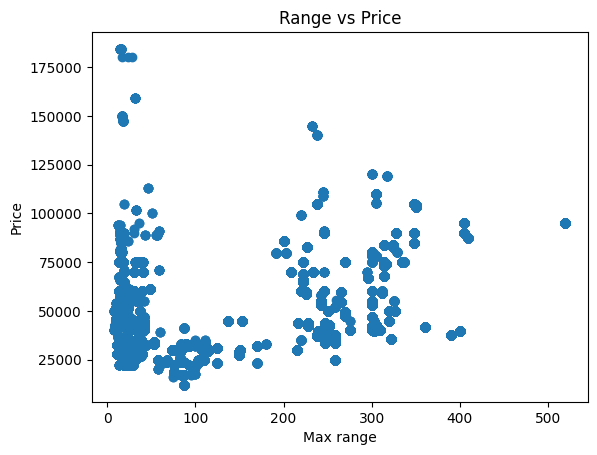

In [ ]:
plt.scatter(cleaned_prices["Max Range"], cleaned_prices["Fetched Price"])
plt.xlabel("Max range")
plt.ylabel("Price")
plt.title("Range vs Price")
plt.show()

There does not seem to be a strong relation between range and price.  
Higher price does not guarantee more range.  
Infact, mid-priced EVs have the most range

### Multitvariate Analysis

### Pairplot

<Figure size 1000x600 with 0 Axes>

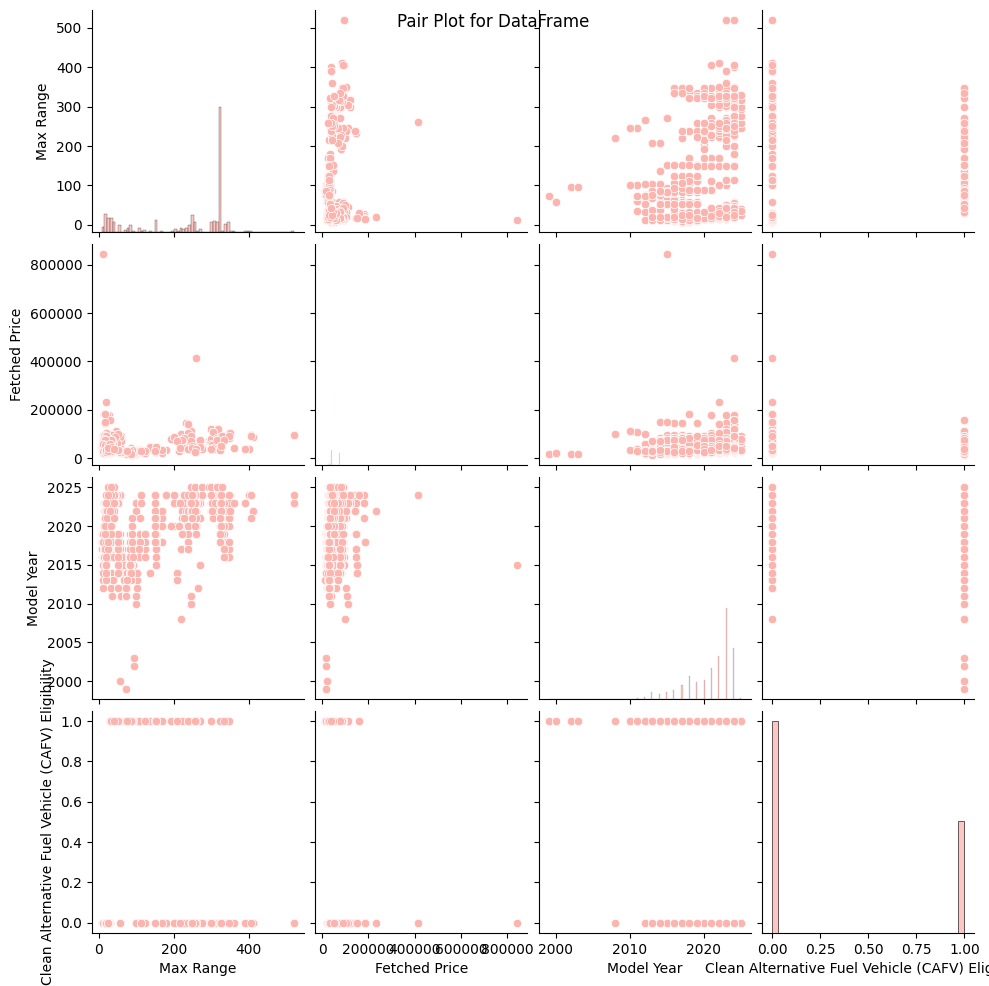

In [ ]:
sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(
    df[
        [
            "Max Range",
            "Fetched Price",
            "Model Year",
            "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
        ]
    ]
)
plt.suptitle("Pair Plot for DataFrame")
plt.show()

### Heatmap

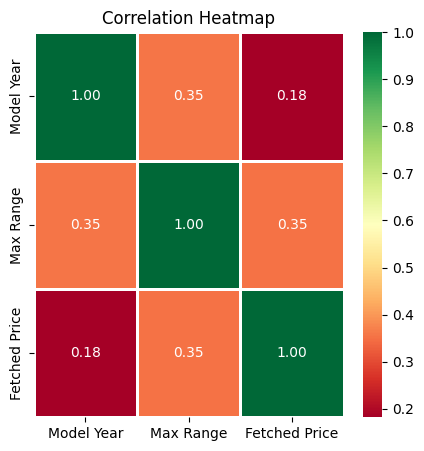

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(
    df[['Model Year', 'Max Range', 'Fetched Price']].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=2,
)
plt.title("Correlation Heatmap")
plt.show()

Low correlation between price, range and sales